<img src="files/images/Synapse_newLogo.png" width="200" height="260" align="left"/>
<br>
<br>

### MTB Webinar Jan 15, 2019
_Abhi Pratap & Larsson Omberg_

#### Goals 

_Section I_
* Explore survey data,  score it and store results back in synapse

_Section II_
*  Explore the collected metadata 

### Section I

#### 1. Connect and log-in to the system
[More details](https://python-docs.synapse.org/build/html/index.html)

In [1]:
import synapseclient
syn = synapseclient.login()

Welcome, Abhishek Pratap!



For demo purposes we will explore the data from a recent mobile study that used three short form versions of Neuro-QOLs. Specifically we will look at the 8-item Neuro-QOL survey for the Lower Extremity.
[Explore data on synapse](https://www.synapse.org/#!Synapse:syn10142944/tables/)

#### 2. Fetch raw data and meta data from Synapse  

In [2]:
nQOL_lowExt_res = syn.tableQuery("select * from syn10142944")
nQOL_lowExt = nQOL_lowExt_res.asDataFrame()

#### Explore meta-data

| meta-data | Description |
|-----------|-------------|
| recordId  | unique record locator for each survey completed |
| appVersion| version of the app used |
| phoneInfo | device information |
| uploadDate| date the activity data got uploaded to the Synapse (via-Brige)|
| healthCode| Unique user-id |
| externalId| any external reference number |
| dataGroups| Case vs Control |
| createdOn | time when the user completed the activity|
| createdOnTimeZone | time zone of the user when the activity was completed|


In [3]:
nQOL_lowExt.head()

,recordId,appVersion,phoneInfo,uploadDate,healthCode,externalId,dataGroups,createdOn,createdOnTimeZone,userSharingScope,validationErrors,01_toilet,02_curbs,03_car,04_bed,05_heavy_door,06_errands,07_off_floor,08_walk,rawData
0_0,2e03d4dc-3cf3-431d-aa49-f38117188438,"version 1.0.0, build 1",Unknown iOS device; iOS/10.3.1,2017-06-24,544e9e70-d984-4712-9001-957bc3140f16,NaN,"control,test_user",1498230833582,-400,ALL_QUALIFIED_RESEARCHERS,NaN,3,3,3,3,3,3,3,3,NaN
1_1,1decba13-43fd-4433-a7a5-208cfa1786f0,"version 1.0.0, build 26",Unknown iOS device; iOS/11.0,2017-08-24,22cf36f5-6ca6-463b-bc31-4887b5e22481,NaN,ms_patient,1503512353880,-700,ALL_QUALIFIED_RESEARCHERS,NaN,1,2,3,1,1,4,3,3,NaN
2_2,8e29fe52-b4da-49d1-9220-99c914611fbd,"version 1.0.0, build 26",Unknown iOS device; iOS/10.3.3,2017-08-29,78fe123e-db5d-4654-88af-8e39cb56b90e,NaN,ms_patient,1503924158985,-400,ALL_QUALIFIED_RESEARCHERS,NaN,2,2,3,2,4,3,2,4,NaN
3_3,5dbc327c-4815-4759-ad1d-3b1dcfd41b56,"version 1.0.0, build 26",Unknown iOS device; iOS/10.3.3,2017-09-01,78fe123e-db5d-4654-88af-8e39cb56b90e,NaN,ms_patient,1504214594516,-400,ALL_QUALIFIED_RESEARCHERS,NaN,2,3,3,3,4,3,2,2,NaN
4_3,096e0921-69ea-40c3-8902-059c6c72549a,"version 1.0.0, build 26",Unknown iOS device; iOS/10.3.3,2017-09-01,405df1ec-4879-43bb-b28c-f7bd9ea775e4,NaN,ms_patient,1504216193629,-600,ALL_QUALIFIED_RESEARCHERS,NaN,3,3,3,3,2,2,3,2,NaN


#### 3. Basic Summary 
Number of surveys completed per user

In [14]:
nQOL_lowExt.groupby(['healthCode']).size().head()

healthCode
023552a3-e3d1-4655-9e41-2565a82f4103    2
02cb22ad-a23b-45b8-8a1d-1dc78de69c64    2
04264003-c959-4c1c-a7dc-b9aff4f3ba9b    1
05488663-7b2a-4931-b5c3-a3f2187c222e    1
06d47507-28f7-47dd-8b4f-3d53862b9fcf    4
dtype: int64

#### 4. Score the NeuroQoL 

In [15]:
## FYI - the following values are reversed (5 -> 1, 1 -> 5) 
## Just for demo purposes
nQOL_lowExt.iloc[:, 11:19].head()

,01_toilet,02_curbs,03_car,04_bed,05_heavy_door,06_errands,07_off_floor,08_walk
0_0,3,3,3,3,3,3,3,3
1_1,1,2,3,1,1,4,3,3
2_2,2,2,3,2,4,3,2,4
3_3,2,3,3,3,4,3,2,2
4_3,3,3,3,3,2,2,3,2


#### 5. Generate raw scores

In [19]:
nQOL_lowExt.columns

Index(['recordId', 'appVersion', 'phoneInfo', 'uploadDate', 'healthCode',
       'externalId', 'dataGroups', 'createdOn', 'createdOnTimeZone',
       'userSharingScope', 'validationErrors', '01_toilet', '02_curbs',
       '03_car', '04_bed', '05_heavy_door', '06_errands', '07_off_floor',
       '08_walk', 'rawData', 'Raw Score'],
      dtype='object')

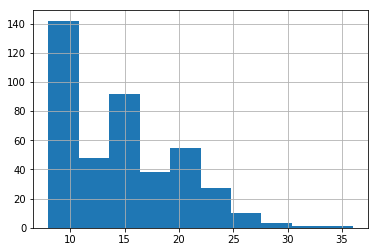

In [41]:
nQOL_lowExt['Raw Score'] = nQOL_lowExt.iloc[:, 11:19].sum(axis=1)
nQOL_lowExt['Raw Score'].hist()

#### 6. Generate T scores

In [42]:
import pandas as pd
tScores = pd.read_csv(syn.get('syn11223833').path)
tScores.head()

,Raw Score,T-Score,SE
0,8,16.5,3.0
1,9,19.2,2.8
2,10,21.1,2.6
3,11,22.6,2.4
4,12,23.9,2.3


In [43]:
nQOL_lowExt_scored = nQOL_lowExt.set_index('Raw Score').join(tScores.set_index('Raw Score')).reset_index()

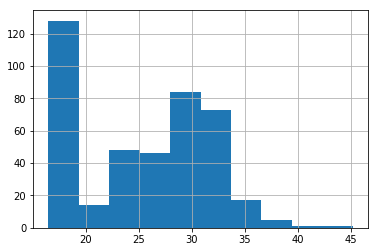

In [44]:
nQOL_lowExt_scored['T-Score'].hist()

### Section II

#### Explore more granular item level meta-data for surveys

In [47]:
rawData = syn.downloadTableColumns(nQOL_lowExt_res, 'rawData')
surveySpecificResponse = rawData.popitem()[1]
surveySpecificResponse

'/Users/apratap/.synapseCache/912/35621912/5d2488f6-0d71-4554-8404-74464ecce3cd-raw.zip'

In [48]:
from zipfile import ZipFile
with ZipFile(surveySpecificResponse, 'r') as zip:
    zip.printdir()
    zip.extractall()

File Name                                             Modified             Size
01_toilet.json                                 2019-01-11 19:34:38          266
02_curbs.json                                  2019-01-11 19:34:38          264
03_car.json                                    2019-01-11 19:34:38          260
04_bed.json                                    2019-01-11 19:34:38          260
05_heavy_door.json                             2019-01-11 19:34:38          274
06_errands.json                                2019-01-11 19:34:38          268
07_off_floor.json                              2019-01-11 19:34:38          272
08_walk.json                                   2019-01-11 19:34:38          262
metadata.json                                  2019-01-11 19:34:38          443
info.json                                      2019-01-11 19:34:38         1619


In [49]:
! cat 01_toilet.json

{
  "questionType" : 2,
  "startDate" : "2019-01-11T19:33:58.415-05:00",
  "questionTypeName" : "SingleChoice",
  "item" : "01_toilet",
  "endDate" : "2019-01-11T19:34:14.192-05:00",
  "answer" : "2",
  "choiceAnswers" : [
    "2"
  ],
  "identifier" : "01_toilet"
}

In [50]:
! cat info.json

{
  "appVersion" : "version 1.1.0, build 27",
  "appName" : "elevateMS",
  "schemaRevision" : 1,
  "phoneInfo" : "Unknown iOS device; iOS\/12.1.2",
  "surveyCreatedOn" : "2017-05-15T16:12:30.784-04:00",
  "surveyGuid" : "08f4c525-2040-4069-aa4e-925dab20c8f0",
  "files" : [
    {
      "contentType" : "application\/json",
      "filename" : "01_toilet.json",
      "timestamp" : "2019-01-11T19:33:58.415-05:00"
    },
    {
      "contentType" : "application\/json",
      "filename" : "02_curbs.json",
      "timestamp" : "2019-01-11T19:34:14.232-05:00"
    },
    {
      "contentType" : "application\/json",
      "filename" : "03_car.json",
      "timestamp" : "2019-01-11T19:34:16.400-05:00"
    },
    {
      "contentType" : "application\/json",
      "filename" : "04_bed.json",
      "timestamp" : "2019-01-11T19:34:19.034-05:00"
    },
    {
      "contentType" : "application\/json",
      "filename" : "05_heavy_door.json",
      "timestamp" : "2019-01-11T19:34:25.153-05:00"
    },
    

In [51]:
### CLEAN UP
! rm -rf *.json